In [1]:
import os
import datetime
import numpy as np
import pandas as pd
import colorcet as cc
import seaborn as sns
import rasterio as rio
import geopandas as gp

import fiona 
import rasterio
import rasterio.mask

import cartopy.crs as ccrs
import cartopy.io.img_tiles as cimgt

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.patches as mpatches
import matplotlib.dates as mdates

from matplotlib.lines import Line2D
from matplotlib.cm import get_cmap
from matplotlib.ticker import StrMethodFormatter
from mpl_toolkits.axes_grid1 import make_axes_locatable
from tqdm import tqdm
from PyIF import te_compute as te
from sklearn import metrics

from osgeo import gdal, osr, ogr
from tqdm import tqdm
from scipy import stats, spatial, signal, fftpack
from scipy.optimize import curve_fit


/Users/aakashahamed/anaconda3/envs/rsenv/lib/python3.8/site-packages/numba/core/decorators.py:255: RuntimeWarning: nopython is set for njit and is ignored
  warnings.warn('nopython is set for njit and is ignored', RuntimeWarning)


In [2]:
gdf = gp.read_file("../shape/sierra_catchments.shp")

In [3]:

def get_fnf(stn_id):
    '''
    Query CA DWR website to get reservoir storage for an area of interest
    '''
    print("**** Fetching FNF for {} ****".format(stn_id))

    url = "https://cdec.water.ca.gov/dynamicapp/req/CSVDataServlet?Stations={}&SensorNums=8&dur_code=D&Start=2000-09-01&End=2021-09-01".format(stn_id)
    df = pd.read_csv(url)

    df[stid] = pd.to_numeric(df['VALUE'], errors='coerce').interpolate(how = 'linear') * 0.0283168 * 86400 # cfs --> cms 
    df.index = pd.to_datetime(df['DATE TIME'])
    df.index.names = ['date']
    df.drop(['STATION_ID', "VALUE", "DURATION", "SENSOR_NUMBER", 
             "SENSOR_TYPE", "OBS DATE",'DATE TIME', "DATA_FLAG", "UNITS"], axis = 1, inplace = True)

    df[df[stid] < 0] = np.nan
    return df.rolling(3).mean().interpolate(how = 'linear')

In [4]:
results_df = []
param_df = []

**** Fetching FNF for SJF ****


<ipython-input-5-f78b8a0f4ddd>:80: RuntimeWarning: invalid value encountered in log
  return np.log(a*x**b)


Parameters: a=0.0733667840062379,  b=0.8971728743455719, K = 8.725060324653125 N = 0.1302307391474384


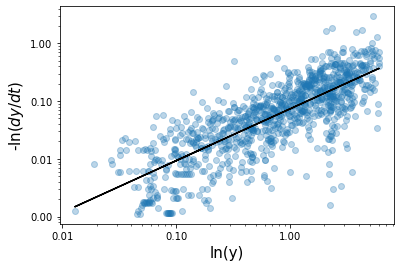

**** Fetching FNF for TLG ****


<ipython-input-5-f78b8a0f4ddd>:80: RuntimeWarning: invalid value encountered in log
  return np.log(a*x**b)


Parameters: a=0.08356032130432392,  b=1.0960768547104023, K = 11.408334067702672 N = 0.06596271672532916


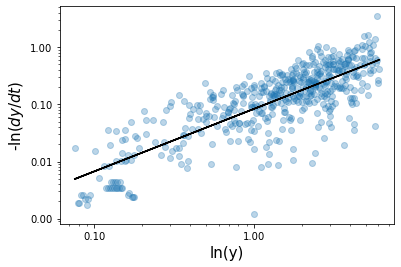

**** Fetching FNF for ISB ****


<ipython-input-5-f78b8a0f4ddd>:80: RuntimeWarning: invalid value encountered in log
  return np.log(a*x**b)


Parameters: a=0.05054441488608553,  b=0.971633850127296, K = 34.25328620512834 N = 0.1602137922044062


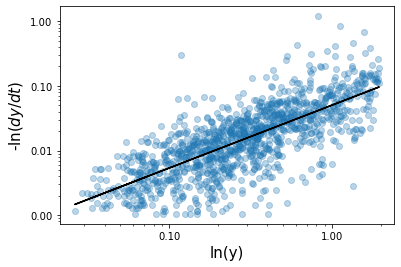

**** Fetching FNF for NAT ****


<ipython-input-5-f78b8a0f4ddd>:80: RuntimeWarning: invalid value encountered in log
  return np.log(a*x**b)


Parameters: a=0.08068201872560239,  b=0.9500314782110102, K = 19.01259921641994 N = 0.14704732107938992


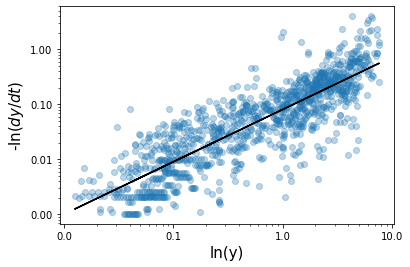

**** Fetching FNF for MHB ****


<ipython-input-5-f78b8a0f4ddd>:80: RuntimeWarning: invalid value encountered in log
  return np.log(a*x**b)


Parameters: a=0.06088973428258184,  b=1.0522697005609847, K = 20.13154254314637 N = 0.17025159692347802


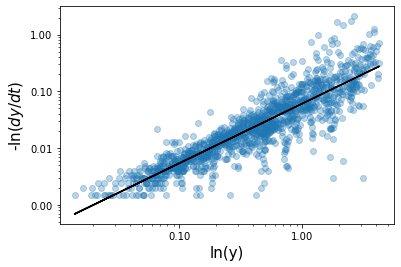

**** Fetching FNF for NML ****


<ipython-input-5-f78b8a0f4ddd>:80: RuntimeWarning: invalid value encountered in log
  return np.log(a*x**b)


Parameters: a=0.06420681520319038,  b=0.8687896279400501, K = 6.621348711236799 N = 0.08369182635901447


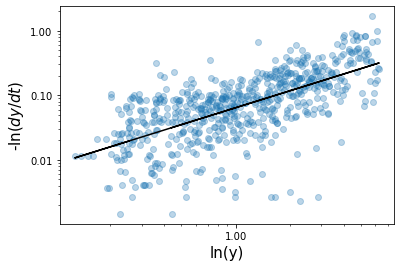

**** Fetching FNF for ORO ****


<ipython-input-5-f78b8a0f4ddd>:80: RuntimeWarning: invalid value encountered in log
  return np.log(a*x**b)


Parameters: a=0.07411521427317343,  b=0.9785227294344635, K = 45.560851247301876 N = 0.1788554295398253


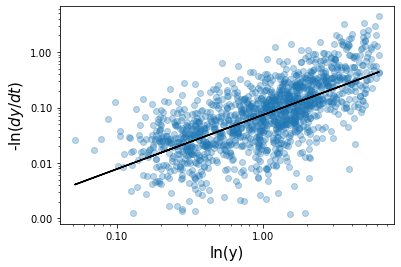

**** Fetching FNF for TRM ****


<ipython-input-5-f78b8a0f4ddd>:80: RuntimeWarning: invalid value encountered in log
  return np.log(a*x**b)


Parameters: a=0.06296894493721639,  b=0.9959710110866671, K = 247.20122902069866 N = 0.10715682440359797


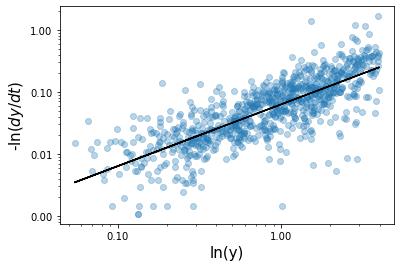

**** Fetching FNF for MKM ****


<ipython-input-5-f78b8a0f4ddd>:80: RuntimeWarning: invalid value encountered in log
  return np.log(a*x**b)


Parameters: a=0.10105351421309393,  b=0.9125708871477364, K = 10.43783766500965 N = 0.08395254855950984


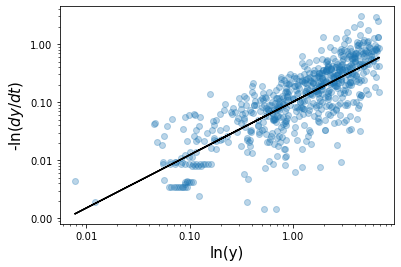

**** Fetching FNF for SCC ****


<ipython-input-5-f78b8a0f4ddd>:80: RuntimeWarning: invalid value encountered in log
  return np.log(a*x**b)


Parameters: a=0.041405416240908634,  b=0.7143608448467835, K = 2.5009205914490305 N = 0.13231651675140138


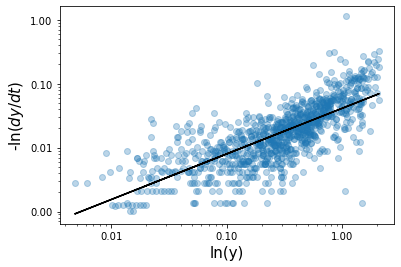

**** Fetching FNF for PNF ****


<ipython-input-5-f78b8a0f4ddd>:80: RuntimeWarning: invalid value encountered in log
  return np.log(a*x**b)


Parameters: a=0.060358252210824304,  b=0.8780607245275631, K = 7.200803195899255 N = 0.12423412853604485


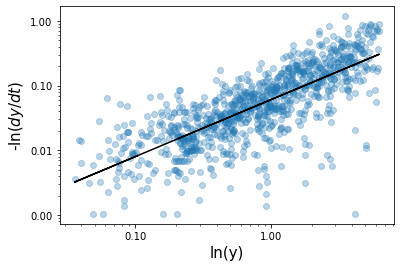

**** Fetching FNF for EXC ****


<ipython-input-5-f78b8a0f4ddd>:80: RuntimeWarning: invalid value encountered in log
  return np.log(a*x**b)


Parameters: a=0.07651526382846656,  b=0.8747380285992128, K = 6.9832688949179 N = 0.12162690653109112


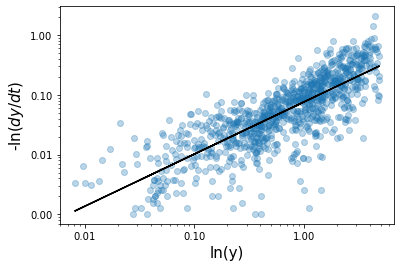

**** Fetching FNF for NHG ****


<ipython-input-5-f78b8a0f4ddd>:80: RuntimeWarning: invalid value encountered in log
  return np.log(a*x**b)


Parameters: a=0.11553845439404015,  b=1.0646653020233967, K = 16.46424386355124 N = 0.09724938078477383


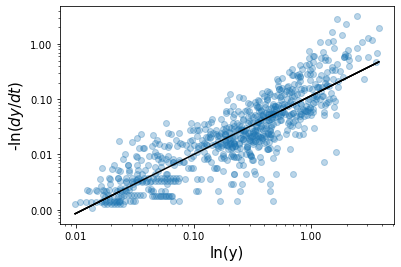

**** Fetching FNF for YRS ****


<ipython-input-5-f78b8a0f4ddd>:80: RuntimeWarning: invalid value encountered in log
  return np.log(a*x**b)


Parameters: a=0.061907782593295095,  b=0.986026161383107, K = 70.56229776341443 N = 0.09385999217833399


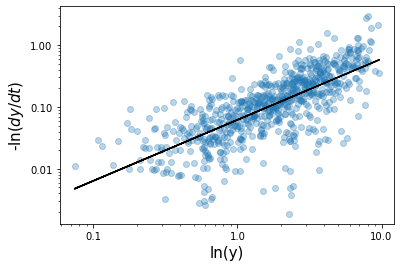

**** Fetching FNF for SHA ****


<ipython-input-5-f78b8a0f4ddd>:80: RuntimeWarning: invalid value encountered in log
  return np.log(a*x**b)


Parameters: a=0.06387699636047804,  b=1.661556063761135, K = 2.511587686634923 N = 0.17468387433189936


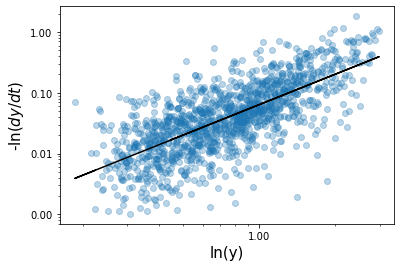

In [5]:
for stid in list(gdf['stid'])[:]:
    
    akm2 = float(gdf[gdf['stid'] == stid].area_km2)
    elev = float(gdf[gdf['stid'] == stid].elev_ft)
        
    fnf_df = get_fnf(stid)

    hdf = fnf_df.copy()

    hdf.columns = ['y']
    hdf['y'] = hdf['y'] / float(akm2) * 1e-9 * 1e6 #
    hdf['dy'] = hdf['y'].diff()

    hdf = hdf.fillna(0)

    # Drop rows with increasing baseflow 
    droprows = []
    for idx, row in hdf.reset_index().iterrows():
        if row['dy'] >= 0:
            droprows.append([idx + x for x in list(range(-2,2))])

    drs = [item for sublist in droprows for item in sublist]
    drs = [x for x in drs if x>=0 and x <len(hdf)]
    drs = np.array(list(drs))

    odf = hdf.reset_index().drop(hdf.reset_index().index[drs]).set_index(['date'])
    
    # Remove vvv small values (can't take logs)
    odf = odf[(np.abs(odf) > 0.001).all(axis=1)]

    # Remove outliers 
    odf = odf[(np.abs(stats.zscore(odf['y'])) < 3)]

    # Depending on area and elevation, keep different months
    odf['midx'] = odf.index.month
    
    # for small sized, low elev, keep earlier months
    if akm2 < np.percentile(gdf['area_km2'],33) and elev < np.percentile(gdf['elev_ft'],33):
        odf = odf[odf['midx'].isin([3,4,5,6])]
    
    # for med sized,low elev keep middle months
    if akm2 > np.percentile(gdf['area_km2'],33) and akm2 < np.percentile(gdf['area_km2'],66) and  elev < np.percentile(gdf['elev_ft'],33):
        odf = odf[odf['midx'].isin([4,5,6,7])]
    
    # for large size, low elev, keep all recession months
    if akm2 > np.percentile(gdf['area_km2'],66) and elev < np.percentile(gdf['elev_ft'],33):
        odf = odf[odf['midx'].isin([3,4,5,6,7,8,9,10])]
        
    # for small sized, med elev keep early / middle months
    if elev > np.percentile(gdf['elev_ft'],33) and elev < np.percentile(gdf['elev_ft'],66) and akm2 < np.percentile(gdf['area_km2'],33):
        odf = odf[odf['midx'].isin([3,4,5,6,7])]
    
    # for med sized, med elev keep early / middle months
    if elev > np.percentile(gdf['elev_ft'],33) and elev < np.percentile(gdf['elev_ft'],66) and akm2 > np.percentile(gdf['area_km2'],33) and akm2 < np.percentile(gdf['area_km2'],66):
        odf = odf[odf['midx'].isin([4,5,6,7,8])]
    
    # for large sized, med elev keep all  months
    if elev > np.percentile(gdf['elev_ft'],33) and elev < np.percentile(gdf['elev_ft'],66) and akm2 > np.percentile(gdf['area_km2'],66):
        odf = odf[odf['midx'].isin([3,4,5,6,7,8,9,10])]
        
    ### 
    # for small sized, high elev keep early / middle months
    if elev > np.percentile(gdf['elev_ft'],66) and akm2 < np.percentile(gdf['area_km2'],33):
        odf = odf[odf['midx'].isin([4,5,6,7,8])]
    
    # for med sized, high elev keep early / middle months
    if elev > np.percentile(gdf['elev_ft'],66) and akm2 > np.percentile(gdf['area_km2'],33) and akm2 < np.percentile(gdf['area_km2'],66):
        odf = odf[odf['midx'].isin([5,6,7,8,9])]
    
    # for large sized, high elev keep all months
    if elev > np.percentile(gdf['elev_ft'],66) and elev < np.percentile(gdf['elev_ft'],66):
        odf = odf[odf['midx'].isin([3,4,5,6,7,8,9,10])]

    
    odf.dropna(inplace = True)
    x = odf['y'].values
    y = odf['dy'].abs().values

    def f(x, a, b):
        return np.log(a*x**b)

    popt,pcov=curve_fit(f, x, np.log(y))
    
    temp_df = pd.DataFrame([x,y]).T
    temp_df.columns = ['y','dy']
    temp_df['id'] = [stid for x in range(len(temp_df))]
    results_df.append(temp_df)
    
    pdf = pd.DataFrame([popt[0],popt[1],stid]).T
    pdf.columns = ['a','b','id']
    param_df.append(pdf)

    ax = plt.gca()

    ax.set_xscale("log")
    ax.set_yscale("log")

    ax.scatter(x,y, alpha = 0.3)

    a, b = popt
    K = abs(b/(1-b))
    print("Parameters: a={},  b={}, K = {} N = {}".format(a,b,K,len(x) / len(hdf)))

    #parameter form curve_fit
    py=a*x**b

    ax.loglog(x,py,  color="k")
    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    # ax.get_yaxis().set_major_formatter(StrMethodFormatter('{x:,.4f}')) # 2 decimal places
    # ax.set_xlim([0.01,10])
    # ax.set_ylim([0.0001,1])
    ax.set_ylabel("-ln($dy/dt$)", size = 15)
    ax.set_xlabel("ln(y)", size = 15)
    plt.show()

/Users/aakashahamed/anaconda3/envs/rsenv/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/aakashahamed/anaconda3/envs/rsenv/lib/python3.8/site-packages/seaborn/relational.py:936: UserWarning: relplot is a figure-level function and does not accept the ax= paramter. You may wish to try scatterplot
  warnings.warn(msg, UserWarning)


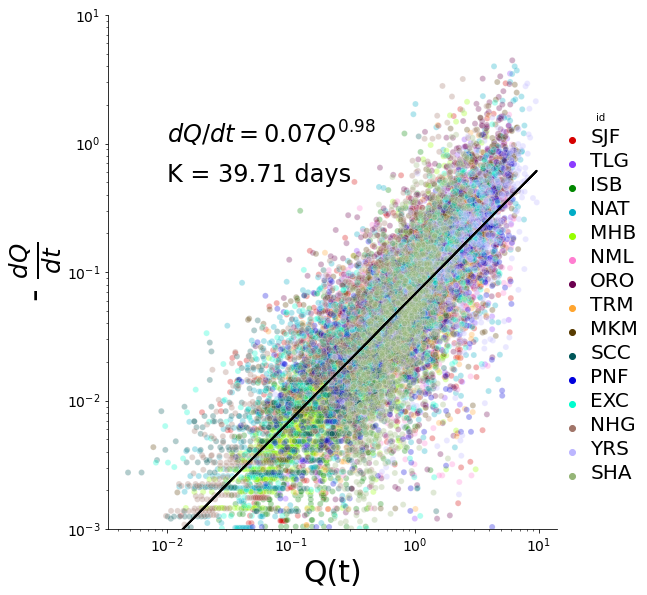

In [6]:
# Master plot
plot_df = pd.concat(results_df, axis = 0)
popt_global,pcov_global=curve_fit(f, plot_df['y'], np.log(plot_df['dy']))
py_glob = popt_global[0]*plot_df['y']**popt_global[1]

palette = sns.color_palette(cc.glasbey, n_colors=15)

t = sns.relplot(data=plot_df, x='y', y='dy', hue='id', palette = palette, aspect=1, alpha = 0.3, ax = ax)
plt.plot(plot_df['y'],py_glob, color = 'black', linewidth = 2)
text = ("$dQ/dt = {{{}}} Q^{{{}}}$").format(round(popt_global[0],2), round(popt_global[1],2))
text2 = ("K = {} days").format(round(popt_global[1]/abs(1-popt_global[1]),2))

# plt.annotate(text, xy = (2e-8,3e-4), size = 12)
# plt.annotate(text2, xy = (2e-8,1e-4), size = 12)
plt.annotate(text, xy = (1e-2,1e0), size = 24)
plt.annotate(text2, xy = (1e-2,5e-1), size = 24)
plt.ylim([1e-3,1e1])
# plt.xlim([1e-1,1e3])
plt.yscale('log')
plt.xscale('log')

plt.ylabel(r'- $\frac{dQ}{dt}$', size = 35)
plt.xlabel("Q(t)", size = 30)

# plt.legend(fontsize='large', title_fontsize='0')
t.fig.set_size_inches(8,8)
plt.setp(t._legend.get_texts(), fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=14)

plt.show()

In [7]:
gdf

,outlet_id,area_km2,catch_name,stid,elev_ft,agency,geometry
0,SAN JOAQUIN RIVER BELOW FRIANT,5122.5534,SAN JOAQUIN R,SJF,294,US Geological Survey,"POLYGON ((-119.17083 37.73750, -119.17000 37.7..."
1,TUOLUMNE R-LA GRANGE DAM,4722.4053,TUOLUMNE R,TLG,170,Turlock Irrigation District,"POLYGON ((-119.65583 38.22833, -119.64917 38.2..."
2,ISABELLA DAM,6226.9722,KERN R,ISB,2635,US Army Corps of Engineers,"POLYGON ((-118.40750 36.70083, -118.40500 36.7..."
3,LAKE NATOMA (NIMBUS DAM),5838.2694,AMERICAN R,NAT,132,US Bureau of Reclamation,"POLYGON ((-120.60083 39.32083, -120.59833 39.3..."
4,COSUMNES RIVER AT MICHIGAN BAR,1672.7634,COSUMNES R,MHB,168,US Geological Survey,"POLYGON ((-120.55417 38.75750, -120.55167 38.7..."
5,NEW MELONES RESERVOIR,2801.7900,STANISLAUS R,NML,1135,US Bureau of Reclamation,"POLYGON ((-119.92417 38.52000, -119.92167 38.5..."
6,OROVILLE DAM,11475.1485,FEATHER R,ORO,900,CA Dept of Water Resources/O&M Oroville Field ...,"POLYGON ((-121.22667 40.50083, -121.22333 40.5..."
7,TERMINUS DAM,1701.7128,KAWEAH R,TRM,752,US Army Corps of Engineers,"POLYGON ((-118.93333 36.72667, -118.93167 36.7..."
8,MOKELUMNE-MOKELUMNE HILL,1688.1372,MOKELUMNE R,MKM,575,East Bay Municipal Utility District,"POLYGON ((-120.01583 38.66583, -120.01500 38.6..."
9,SUCCESS DAM,1182.0492,TULE R,SCC,692,US Army Corps of Engineers,"POLYGON ((-118.68083 36.33417, -118.67833 36.3..."
